# **Part 1: Data Preprocessing & Visualization**

# First, we import the main libraries and load the dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
df = pd.read_csv(url)
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

# Part 1: Data Preprocessing Pipeline

## Data cleaning

* We check the missing values and if we have duplicates

In [53]:
df.isnull().sum()
# df.head(10)

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [54]:
# We have no duplicates
df.duplicated().sum()

np.int64(0)

*  We handle missing values using two different strategies

In [55]:
# We will use the median method because it works better for numerical columns
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
# Convert all values in the 'Gross' column to strings (including NaN), then remove commas to prepare for numeric conversion
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
# For the Certificate column, which contains categorical values like 'U', 'A', 'UA', it makes more sense to use the mode method
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])
# Verify if we handled the missing values
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

### Missing values handling summary

To handle missing values in the dataset, two different strategies were applied based on the nature of the data:

- **Numerical columns:**
  - For `Meta_score` and `Gross`, the **median** was used to fill missing values.
    - Median is a strategy for numerical columns, especially when outliers are present, as it is less affected by extreme values compared to the mean. (extreme values for gross and meta_score cols)

- **Categorical columns:**
  - For `Certificate`, which contains categorical labels like "U", "A", "UA", etc., the **mode** (most frequent value) was used.
    - Mode is more appropriate for categorical variables because it helps preserve the overall distribution of categories.


* We check the numerical columns so we can detect and address outliers

In [56]:
#------------------------------------------------------------------
# Create a copy of the column Runtime which will only have the numerical minutes
df['Runtime_only_minutes'] = df['Runtime'].str.extract(r'(\d+)')
df['Runtime_only_minutes'] = pd.to_numeric(df['Runtime_only_minutes'], errors='coerce')
# Convert the non-numeric values to NaN, then we change the values that are not numerical to N/A
df['Released_Year_numeric'] = pd.to_numeric(df['Released_Year'], errors='coerce') # new column or change the ones from dataset
df['Released_Year_clean'] = df['Released_Year_numeric'].fillna("N/A")
#------------------------------------------------------------------
def print_outliers():
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f'{col}: {len(outliers)} outliers out of {len(df)}')
print_outliers()


IMDB_Rating: 13 outliers out of 1000
Meta_score: 31 outliers out of 1000
No_of_Votes: 67 outliers out of 1000
Gross: 125 outliers out of 1000
Runtime_only_minutes: 29 outliers out of 1000
Released_Year_numeric: 7 outliers out of 1000


## We handle the detected outliers

                                          Poster_Link  \
0   https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1   https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2   https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3   https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4   https://m.media-amazon.com/images/M/MV5BMWU4N2...   
5   https://m.media-amazon.com/images/M/MV5BNzA5ZD...   
6   https://m.media-amazon.com/images/M/MV5BNGNhMD...   
7   https://m.media-amazon.com/images/M/MV5BNDE4OT...   
8   https://m.media-amazon.com/images/M/MV5BMjAxMz...   
9   https://m.media-amazon.com/images/M/MV5BMmEzNT...   
10  https://m.media-amazon.com/images/M/MV5BN2EyZj...   
11  https://m.media-amazon.com/images/M/MV5BNWIwOD...   
12  https://m.media-amazon.com/images/M/MV5BOTQ5ND...   

                                         Series_Title Released_Year  \
0                            The Shawshank Redemption          1994   
1                                       The Godfather      

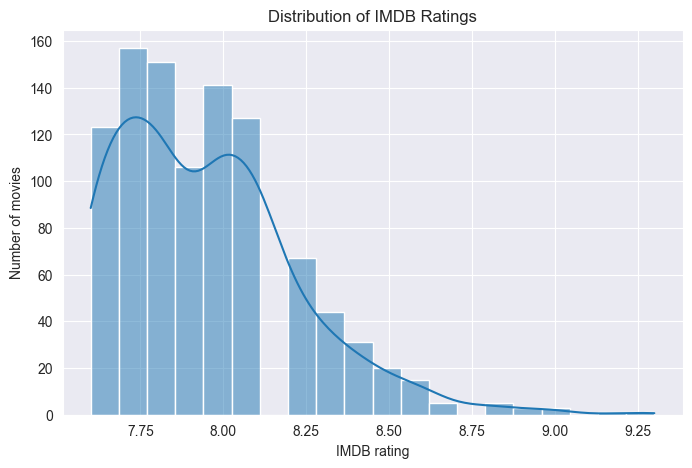

In [57]:
# IMDB_Rating
def imdb_rating():
    Q1 = df['IMDB_Rating'].quantile(0.25)
    Q3 = df['IMDB_Rating'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['IMDB_Rating'] < lower) | (df['IMDB_Rating'] > upper)]
    print(outliers)
    plt.figure(figsize=(8, 5))
    sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
    plt.title("Distribution of IMDB Ratings")
    plt.xlabel("IMDB rating")
    plt.ylabel("Number of movies")
    plt.grid(True)
    plt.show()
imdb_rating()
# Although the IQR method identified several outliers in the IMDB_Rating column, these values correspond to highly rated, well-known films
# and are not data errors but extreme values. Therefore, I decided to keep these outliers in the analysis


In [58]:
# Meta_score
def meta_score():
    Q1 = df['Meta_score'].quantile(0.25)
    Q3 = df['Meta_score'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['Meta_score'] < lower) | (df['Meta_score'] > upper)]
    print(outliers)
meta_score()

# The IQR method identified several outliers in the Meta_score column, mostly representing movies with significantly low critic scores.
# These values not data errors, so I decided to keep these values in the dataset.

                                           Poster_Link  \
272  https://m.media-amazon.com/images/M/MV5BZDhlZT...   
342  https://m.media-amazon.com/images/M/MV5BMTA2ND...   
352  https://m.media-amazon.com/images/M/MV5BMTUyMT...   
356  https://m.media-amazon.com/images/M/MV5BYmI1OD...   
397  https://m.media-amazon.com/images/M/MV5BNzZmMj...   
569  https://m.media-amazon.com/images/M/MV5BMTlkMm...   
597  https://m.media-amazon.com/images/M/MV5BMTQ4Mz...   
615  https://m.media-amazon.com/images/M/MV5BMTM4Nz...   
630  https://m.media-amazon.com/images/M/MV5BMTU4NT...   
644  https://m.media-amazon.com/images/M/MV5BYThkMz...   
648  https://m.media-amazon.com/images/M/MV5BYzVmMT...   
659  https://m.media-amazon.com/images/M/MV5BODRkYz...   
677  https://m.media-amazon.com/images/M/MV5BY2QwYm...   
735  https://m.media-amazon.com/images/M/MV5BMTgwNT...   
742  https://m.media-amazon.com/images/M/MV5BMTM3Nz...   
760  https://m.media-amazon.com/images/M/MV5BMTU2Nj...   
782  https://m

In [59]:
# No_of_votes
def no_of_votes():
    Q1 = df['No_of_Votes'].quantile(0.25)
    Q3 = df['No_of_Votes'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['No_of_Votes'] < lower) | (df['No_of_Votes'] > upper)]
    print(outliers)
no_of_votes()

# As for the previous outliers, these represent highly popular movies and were kept in the analysis.

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
5    https://m.media-amazon.com/images/M/MV5BNzA5ZD...   
..                                                 ...   
376  https://m.media-amazon.com/images/M/MV5BNGYyZG...   
477  https://m.media-amazon.com/images/M/MV5BOTAzOD...   
502  https://m.media-amazon.com/images/M/MV5BMTczNT...   
623  https://m.media-amazon.com/images/M/MV5BMTYwOT...   
652  https://m.media-amazon.com/images/M/MV5BMDdmZG...   

                                          Series_Title Released_Year  \
0                             The Shawshank Redemption          1994   
1                                        The Godfather          1972   
2                                      The Dark Knight          2008   
3              

In [60]:
# Gross
def gross():
    Q1 = df['Gross'].quantile(0.25)
    Q3 = df['Gross'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['Gross'] < lower) | (df['Gross'] > upper)]
    print(outliers)
gross()

# Gross outliers reflect real blockbuster earnings and were not removed.

                                           Poster_Link  \
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
5    https://m.media-amazon.com/images/M/MV5BNzA5ZD...   
8    https://m.media-amazon.com/images/M/MV5BMjAxMz...   
10   https://m.media-amazon.com/images/M/MV5BN2EyZj...   
11   https://m.media-amazon.com/images/M/MV5BNWIwOD...   
..                                                 ...   
927  https://m.media-amazon.com/images/M/MV5BNzU3ND...   
928  https://m.media-amazon.com/images/M/MV5BNWMxYT...   
947  https://m.media-amazon.com/images/M/MV5BNjQ3NW...   
966  https://m.media-amazon.com/images/M/MV5BNjEzYj...   
973  https://m.media-amazon.com/images/M/MV5BMzFkM2...   

                                          Series_Title Released_Year  \
2                                      The Dark Knight          2008   
5        The Lord of the Rings: The Return of the King          2003   
8                                            Inception          2010   
10   The Lord o

In [61]:
# Runtime_only_minutes
def runtime():
    Q1 = df['Runtime_only_minutes'].quantile(0.25)
    Q3 = df['Runtime_only_minutes'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['Runtime_only_minutes'] < lower) | (df['Runtime_only_minutes'] > upper)]
    print(outliers)
runtime()

# All values were found to be realistic durations, so no further action was taken.

                                           Poster_Link  \
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
5    https://m.media-amazon.com/images/M/MV5BNzA5ZD...   
7    https://m.media-amazon.com/images/M/MV5BNDE4OT...   
25   https://m.media-amazon.com/images/M/MV5BMTUxMz...   
31   https://m.media-amazon.com/images/M/MV5BOWE4ZD...   
71   https://m.media-amazon.com/images/M/MV5BMGFkNW...   
116  https://m.media-amazon.com/images/M/MV5BYWY5Zj...   
140  https://m.media-amazon.com/images/M/MV5BMTc5Nj...   
156  https://m.media-amazon.com/images/M/MV5BYzExOT...   
177  https://m.media-amazon.com/images/M/MV5BOGZiM2...   
194  https://m.media-amazon.com/images/M/MV5BZWFhOG...   
206  https://m.media-amazon.com/images/M/MV5BYzE2Mj...   
247  https://m.media-amazon.com/images/M/MV5BNDYxNW...   
258  https://m.media-amazon.com/images/M/MV5BYmNjYz...   
290  https://m.media-amazon.com/images/M/MV5BNjM2Mj...   
300  https://m.media-amazon.com/images/M/MV5BNjgxY2...   
314  https://m

In [62]:
# Released_Year_numeric

df[df['Released_Year_numeric'] > 2025]


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_only_minutes,Released_Year_numeric,Released_Year_clean


In [63]:
df[df['Released_Year_numeric'] < 1900]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_only_minutes,Released_Year_numeric,Released_Year_clean


In [64]:
# There are no unrealistic years for the released movies

### Outliers handling summary

Outliers were detected across all numerical columns using the Interquartile Range (IQR) method, which defines extreme values as those lying outside the range.

- **IMDB_Rating**: Outliers correspond to highly rated, well-known movies. These values are not erroneous and were kept in the dataset.
- **Meta_score**: Outliers mostly represent movies with unusually low critic scores. These values were preserved as they reflect valid critic opinions.
- **No_of_Votes**: Outliers represent highly popular movies with a significantly large number of votes. These values were also retained.
- **Gross**: Outliers indicate blockbuster movies with exceptional earnings. Since they are legitimate values, no removal was necessary.
- **Runtime**: Although some outliers were identified, all values were found to be realistic durations, so no action was taken.
- **Released_Year**: No unrealistic values were detected (all years fall within a valid range), hence no corrections were required.

The decision to keep outliers was based on domain knowledge and data integrity, ensuring the dataset remains representative of real-world distributions.


* Inconsistency handling


In [65]:
# We check the type of the objects to see which numerical values need conversion
df.dtypes

Poster_Link               object
Series_Title              object
Released_Year             object
Certificate               object
Runtime                   object
Genre                     object
IMDB_Rating              float64
Overview                  object
Meta_score               float64
Director                  object
Star1                     object
Star2                     object
Star3                     object
Star4                     object
No_of_Votes                int64
Gross                    float64
Runtime_only_minutes       int64
Released_Year_numeric    float64
Released_Year_clean       object
dtype: object

### For categorical columns

In [66]:
# The 'Genre' column was standardized by converting all values to title case
df['Genre'] = df['Genre'].str.title()
df['Genre']

0                         Drama
1                  Crime, Drama
2          Action, Crime, Drama
3                  Crime, Drama
4                  Crime, Drama
                 ...           
995      Comedy, Drama, Romance
996              Drama, Western
997         Drama, Romance, War
998                  Drama, War
999    Crime, Mystery, Thriller
Name: Genre, Length: 1000, dtype: object

In [67]:
# We standardize the 'Certificate' column by stripping whitespace and converting all values to uppercase
df['Certificate'] = df['Certificate'].str.strip().str.upper()
print(df['Certificate'].unique())

['A' 'UA' 'U' 'PG-13' 'R' 'PG' 'G' 'PASSED' 'TV-14' '16' 'TV-MA' 'UNRATED'
 'GP' 'APPROVED' 'TV-PG' 'U/A']


In [68]:
# The 'Series_Title' column was cleaned using '.str.strip()' to remove any leading or trailing whitespace
df['Series_Title'] = df['Series_Title'].str.strip()
print(df['Series_Title'].unique())

['The Shawshank Redemption' 'The Godfather' 'The Dark Knight'
 'The Godfather: Part II' '12 Angry Men'
 'The Lord of the Rings: The Return of the King' 'Pulp Fiction'
 "Schindler's List" 'Inception' 'Fight Club'
 'The Lord of the Rings: The Fellowship of the Ring' 'Forrest Gump'
 'Il buono, il brutto, il cattivo' 'The Lord of the Rings: The Two Towers'
 'The Matrix' 'Goodfellas'
 'Star Wars: Episode V - The Empire Strikes Back'
 "One Flew Over the Cuckoo's Nest" 'Hamilton' 'Gisaengchung'
 'Soorarai Pottru' 'Interstellar' 'Cidade de Deus'
 'Sen to Chihiro no kamikakushi' 'Saving Private Ryan' 'The Green Mile'
 'La vita \x1a bella' 'Se7en' 'The Silence of the Lambs' 'Star Wars'
 'Seppuku' 'Shichinin no samurai' "It's a Wonderful Life" 'Joker'
 'Whiplash' 'The Intouchables' 'The Prestige' 'The Departed' 'The Pianist'
 'Gladiator' 'American History X' 'The Usual Suspects' 'L\x1aon'
 'The Lion King' 'Terminator 2: Judgment Day' 'Nuovo Cinema Paradiso'
 'Hotaru no haka' 'Back to the Future' 

### For numerical columns

In [69]:
# Converted 'Gross', 'Runtime' and 'Released_Year' (Released_Year_numeric) to numeric
# for faster and better analysis

df.dtypes

Poster_Link               object
Series_Title              object
Released_Year             object
Certificate               object
Runtime                   object
Genre                     object
IMDB_Rating              float64
Overview                  object
Meta_score               float64
Director                  object
Star1                     object
Star2                     object
Star3                     object
Star4                     object
No_of_Votes                int64
Gross                    float64
Runtime_only_minutes       int64
Released_Year_numeric    float64
Released_Year_clean       object
dtype: object

### Inconsistency handling summary

To ensure data quality and consistency, both categorical and numerical columns were inspected and cleaned as needed.

**Categorical Columns:**
- `Genre`: Standardized to ensure consistent capitalization (e.g., "sci-fi" → "Sci-Fi").
- `Certificate`: Inconsistent values (e.g., "pg13", "Pg-13") were unified to a single format (e.g., "PG-13").
- `Series_Title`: Stripped whitespace to avoid hidden inconsistencies.

**Numerical Columns:**
- `Gross`: Originally stored as strings with commas. Commas were removed and values were converted to numeric.
- `Runtime`: Extracted numeric values from the original format (e.g., "120 min") into a new column `Runtime_only_minutes`, then converted to numeric.
- `Released_Year`: Converted to numeric (`Released_Year_numeric`) to allow proper sorting and outlier detection.



## Data Transformation

* Normalize or standardize numerical features where necessary

In [70]:
 # Columns on which scaling will be applied
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime_only_minutes']

# Initialize the scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply StandardScaler
for col in numeric_cols:
    df[f'{col}_Standard'] = standard_scaler.fit_transform(df[[col]])

# Display the first rows of the newly scaled columns for verification
df[[col for col in df.columns if 'MinMax' in col or 'Standard' in col]].head()

,IMDB_Rating_Standard,Meta_score_Standard,No_of_Votes_Standard,Gross_Standard,Runtime_only_minutes_Standard
0,4.905332,0.164312,6.324451,-0.317378,0.680529
1,4.542162,1.924482,4.115639,0.734477,1.855759
2,3.815823,0.516346,6.202578,4.679413,1.036659
3,3.815823,1.044397,2.616857,-0.031702,2.817310
4,3.815823,1.572448,1.271824,-0.553955,-0.957670


### Normalize/Standardize numerical features

Standard scaling were applied to numerical columns to normalize values and ensure balanced feature contribution.


In [71]:
# One-Hot Encoding for Certificate
df = pd.get_dummies(df, columns=['Certificate'], prefix='Cert')
# Now have Cert_PG, Cert_R etc
# One-Hot Encoding for Genre
# NaN converted to '' so we can get_dummies
df['Genre'] = df['Genre'].fillna('')
# Multi-label handled separately
df_genres = df['Genre'].str.get_dummies(sep=', ')
# Concatenates the new cols to the dataset
df = pd.concat([df, df_genres], axis=1)


### Data Transformation Summary

- Scaled numerical features using Standard scalers.
- Encoded categorical variables using One-Hot Encoding.
- Handled multi-label `Genre` column separately.

These steps ensured consistent data structure for further analysis.


## Data Reduction

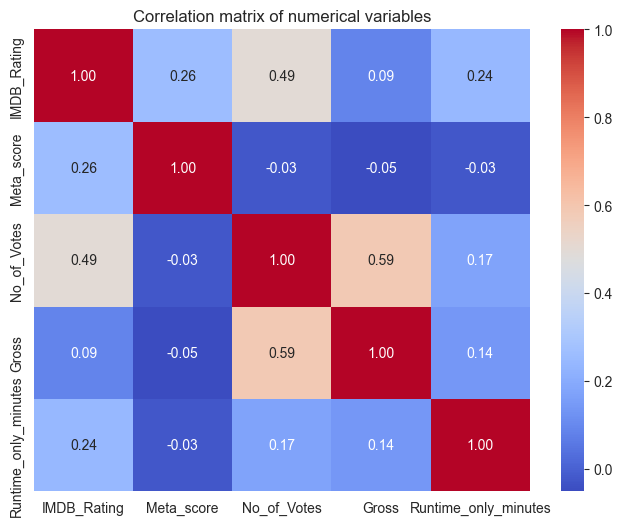

Columns retained after VarianceThreshold:
['Meta_score', 'No_of_Votes', 'Gross', 'Runtime_only_minutes']
Explained variance ratio of each PCA component: [0.41685956 0.24890139]
Sum of explained variances: 0.665760946882698


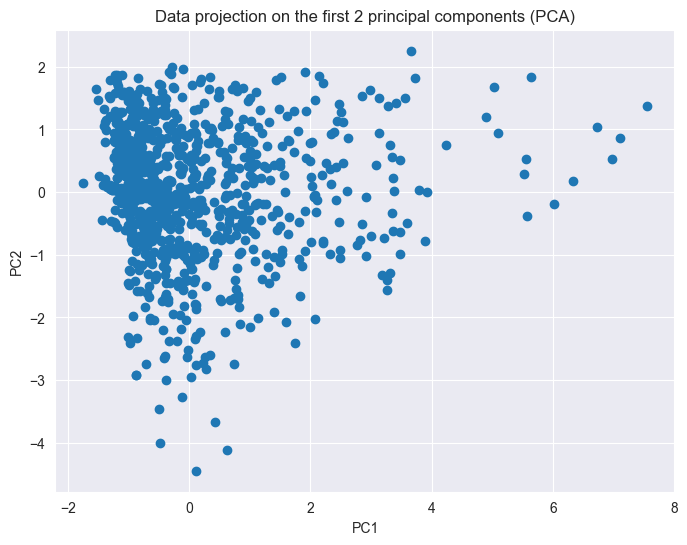

In [72]:
# For variance-based feature selection and PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# 2. Select the relevant numerical columns
num_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime_only_minutes']
df_num = df[num_cols].copy()

# 3. Drop missing values (if any) to avoid errors in further calculations
df_num.dropna(inplace=True)

# STEP 1: Correlation analysis
# Calculate the correlation matrix to identify if any variables are highly correlated
corr_matrix = df_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix of numerical variables")
plt.show()

# Based on this matrix, we can decide to manually drop certain redundant columns
# (if two columns have correlation around 0.95+). Here, we only visualize it.
# For simplicity, we'll keep them all and let VarianceThreshold + PCA handle any redundancy.

# STEP 2: Remove Low-Variance features (VarianceThreshold)
# This step removes columns that have almost the same value for all observations
selector = VarianceThreshold(threshold=0.1)
df_reduced_array = selector.fit_transform(df_num)
selected_features = df_num.columns[selector.get_support()]
df_reduced = pd.DataFrame(df_reduced_array, columns=selected_features)

print("Columns retained after VarianceThreshold:")
print(selected_features.tolist())

# STEP 3: Standardization (StandardScaler)
# For PCA, it is recommended to scale the data so each feature has equal initial influence.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_reduced)

# STEP 4: PCA (Dimensionality Reduction)
# We will reduce to 2 principal components (PC1 and PC2) to visualize in 2D.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the two principal components
df_pca = pd.DataFrame(data=pca_result, columns=['PC1','PC2'])

# Display the explained variance by each component
print("Explained variance ratio of each PCA component:", pca.explained_variance_ratio_)
print("Sum of explained variances:", sum(pca.explained_variance_ratio_))

# STEP 5: Quick Visualization of PCA results
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data projection on the first 2 principal components (PCA)')
plt.show()

# --- Final Observations ---
# 1) By removing low-variance columns and applying PCA, we reduce the dataset's dimensionality.
#    This can make models run faster and reduce the risk of overfitting.
# 2) Interpretability improves because we focus on components (or features) that
#    explain most of the data variance.


### Data Reduction

1. **Correlation Matrix**
   We selected a few important numeric columns and plotted their correlation to spot redundancies.

2. **Variance Threshold**
   We dropped features with very low variance (IMDB_Rating). Such columns add little information and can be removed to improve performance and interpretability.


## Feature Engineering


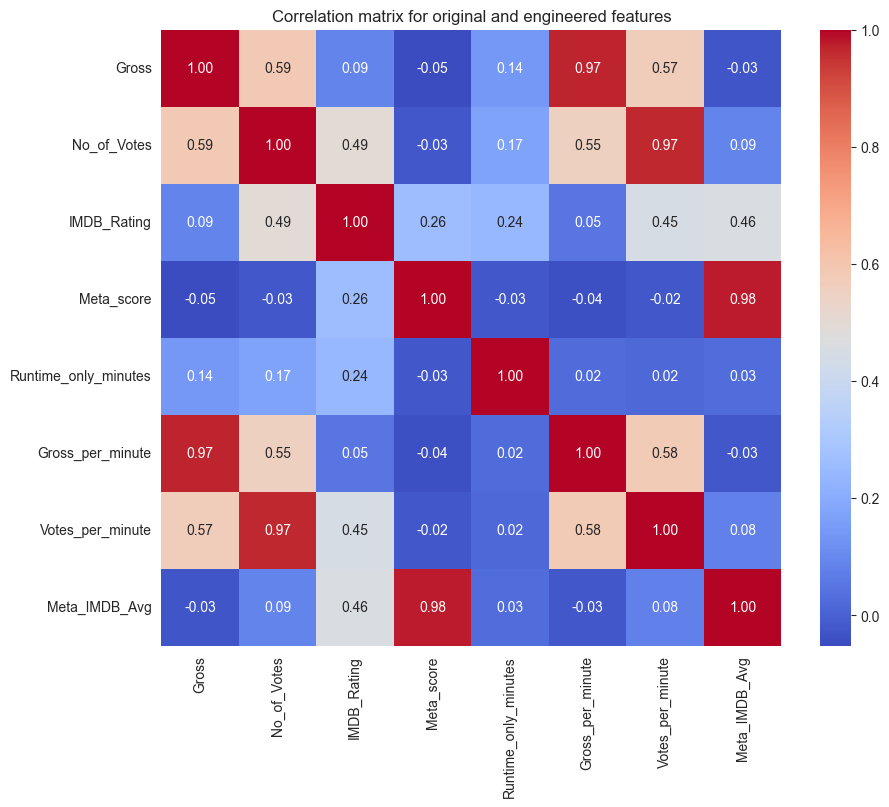

In [73]:
# Create new features using domain knowledge:
# 1. Gross_per_minute: Profitability per minute of movie runtime.
df['Gross_per_minute'] = df['Gross'] / df['Runtime_only_minutes']

# 2. Votes_per_minute: Popularity normalized by movie duration.
df['Votes_per_minute'] = df['No_of_Votes'] / df['Runtime_only_minutes']

# 3. Meta_IMDB_Avg: Combined average score using Meta_score and IMDB_Rating (scaled to 100).
df['Meta_IMDB_Avg'] = (df['Meta_score'] + df['IMDB_Rating'] * 10) / 2

# Validate the impact of these new features using correlation analysis:
features_to_corr = [
    'Gross', 'No_of_Votes', 'IMDB_Rating', 'Meta_score', 'Runtime_only_minutes',
    'Gross_per_minute', 'Votes_per_minute', 'Meta_IMDB_Avg'
]
corr_matrix = df[features_to_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for original and engineered features")
plt.show()

### Feature Engineering Summary

- **Gross_per_minute**: Calculated as Gross divided by Runtime_only_minutes, this feature measures the profitability per minute of a movie.
- **Votes_per_minute**: Derived by dividing No_of_Votes by Runtime_only_minutes, it reflects movie popularity adjusted for duration.
- **Meta_IMDB_Avg**: A combined score obtained by averaging Meta_score and IMDB_Rating (after scaling IMDB_Rating to a 100-point scale), providing an overall quality metric.

Correlation analysis was performed to validate these new features by examining their relationships with the original variables. This helps us understand their contribution and potential predictive power in further analysis or recommendation logic.


# **Part 2: Extracting & Visualizing Insights**

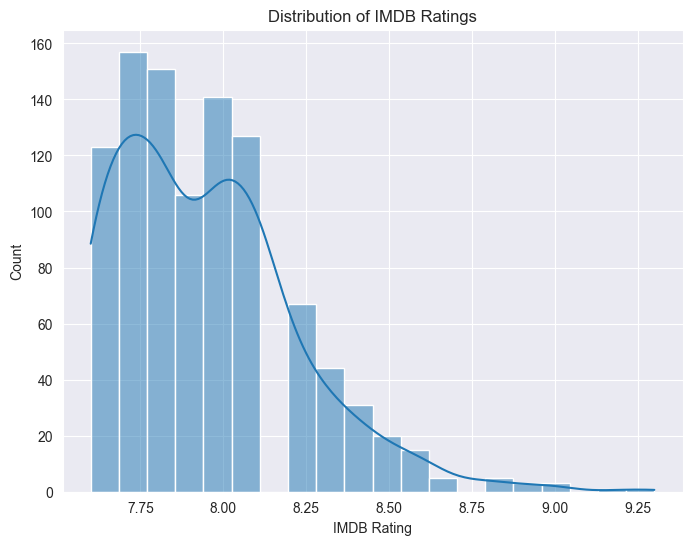

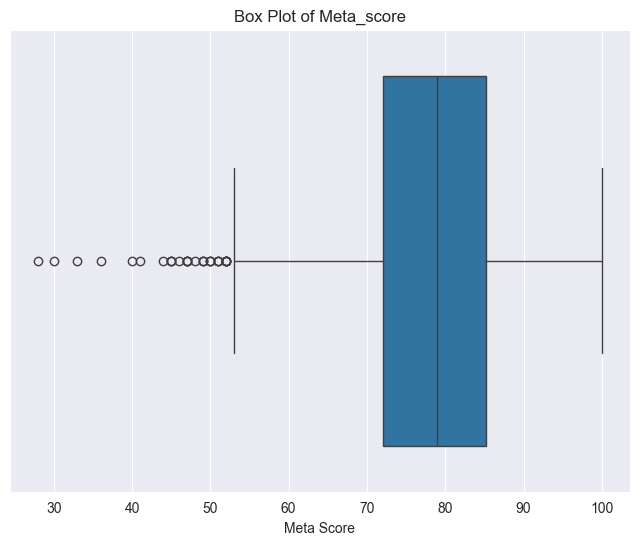

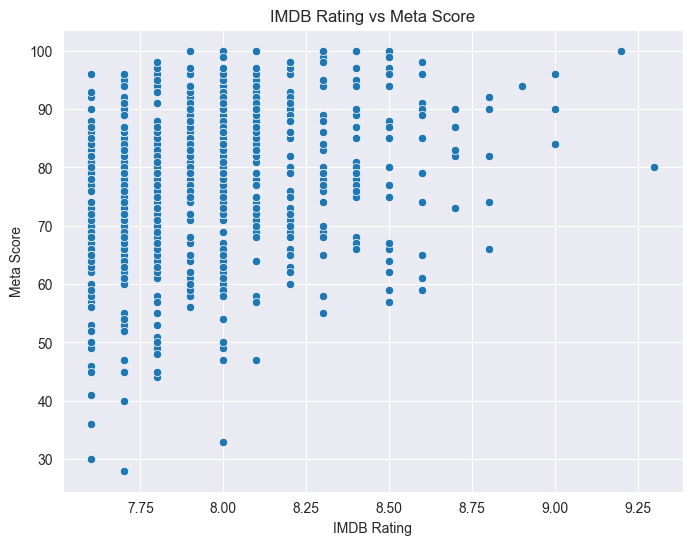

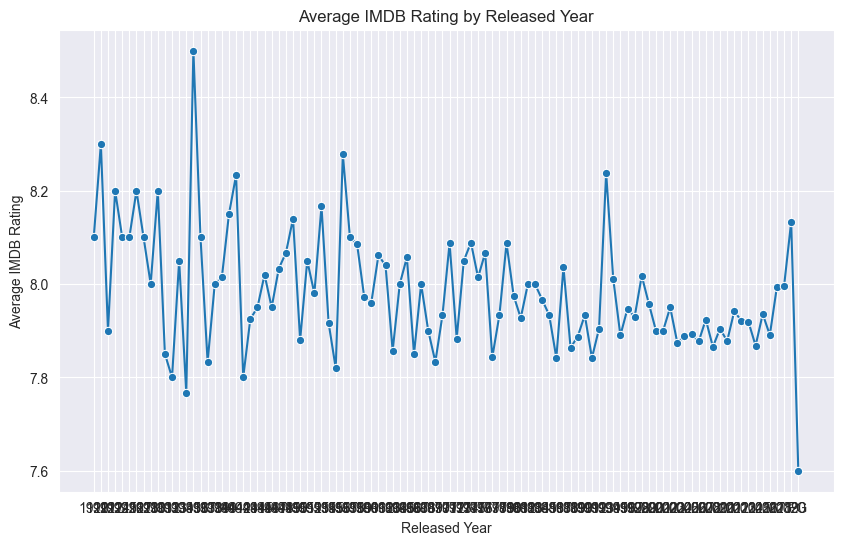

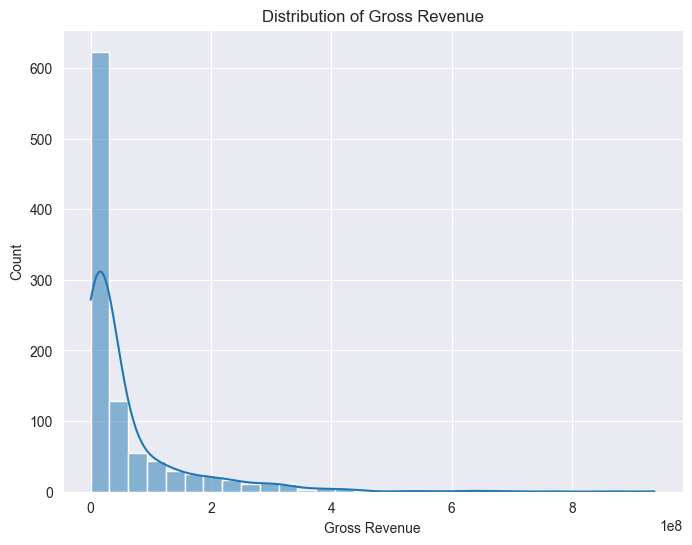

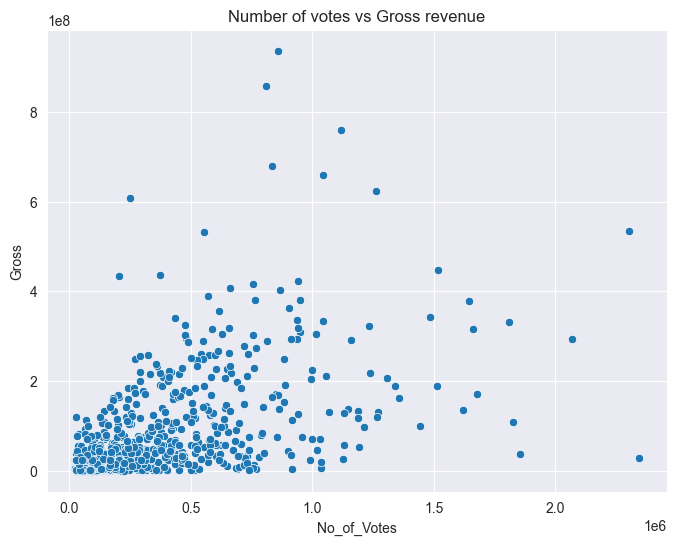

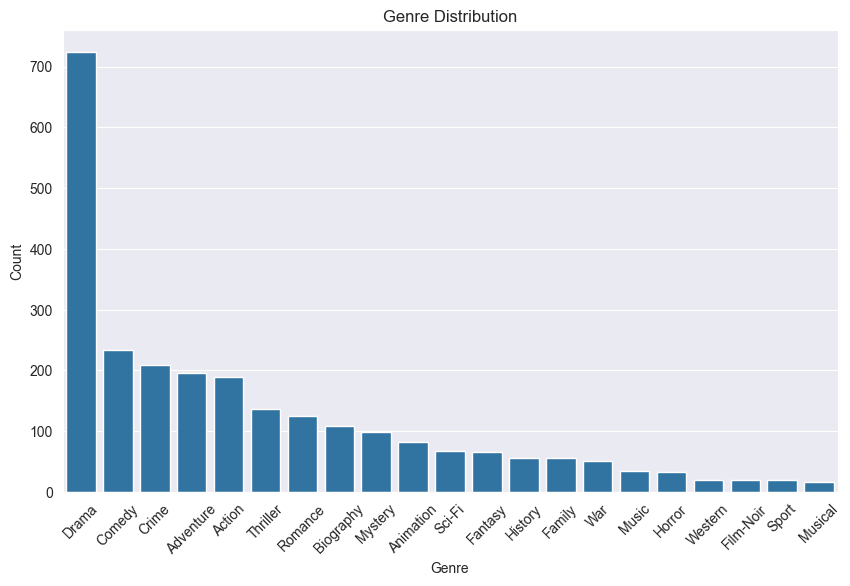

KeyError: 'Certificate'

<Figure size 800x600 with 0 Axes>

In [74]:
# 1) Convert 'Gross' to numeric
df['Gross'] = pd.to_numeric(
    df['Gross'].astype(str).str.replace(',', '', regex=True),
    errors='coerce'
)

# 2) If needed, create 'Runtime_only_minutes' from 'Runtime'
# df['Runtime_only_minutes'] = pd.to_numeric(df['Runtime'].str.extract(r'(\d+)')[0], errors='coerce')

# -----------------------------------------------------------
# Insight 1: Distribution of IMDB Ratings
# Most movies have IMDB ratings between 7 and 9
plt.figure(figsize=(8,6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title("Distribution of IMDB Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("Count")
plt.show()

# -----------------------------------------------------------
# Insight 2: Box Plot of Meta_score
# Critics scoring: low, medium, high and unusual scores
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Meta_score'])
plt.title("Box Plot of Meta_score")
plt.xlabel("Meta Score")
plt.show()

# -----------------------------------------------------------
# Insight 3: IMDB_Rating vs Meta_score (Scatter Plot)
# Examines the relationship between critics and users score
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='IMDB_Rating', y='Meta_score')
plt.title("IMDB Rating vs Meta Score")
plt.xlabel("IMDB Rating")
plt.ylabel("Meta Score")
plt.show()

# -----------------------------------------------------------
# Insight 4: Average IMDB Rating by released year (Line Plot)
# Shows how average IMDB ratings changed from year to year
rating_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=rating_by_year, x='Released_Year', y='IMDB_Rating', marker='o')
plt.title("Average IMDB Rating by Released Year")
plt.xlabel("Released Year")
plt.ylabel("Average IMDB Rating")
plt.show()

# -----------------------------------------------------------
# Insight 5: Distribution of Gross Revenue
# Most movies earn average money. Only a few movies earn very big money
plt.figure(figsize=(8,6))
sns.histplot(df['Gross'], bins=30, kde=True)
plt.title("Distribution of Gross Revenue")
plt.xlabel("Gross Revenue")
plt.ylabel("Count")
plt.show()

# -----------------------------------------------------------
# Insight 6: No_of_Votes vs Gross Revenue (Scatter Plot)
# Shows if movies with more audience votes also make more money
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='No_of_Votes', y='Gross')
plt.title("Number of votes vs Gross revenue")
plt.xlabel("No_of_Votes")
plt.ylabel("Gross")
plt.show()

# -----------------------------------------------------------
# Insight 7: Genre Distribution (Bar Plot)
# Shows which movie genres appear the most
genre_counts = df['Genre'].dropna().str.split(', ').explode().value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------------------------------------
# Insight 8: Certificate Distribution (Count Plot)
# Shows how many movies are for each age rating
plt.figure(figsize=(8,6))
sns.countplot(x=df['Certificate'])
plt.title("Certificate Distribution")
plt.xlabel("Certificate")
plt.ylabel("Count")
plt.show()

# -----------------------------------------------------------
# Insight 9: Distribution of Runtime (minutes)
# Shows how long most movies are
plt.figure(figsize=(8,6))
sns.histplot(df['Runtime_only_minutes'], bins=20, kde=True)
plt.title("Distribution of Runtime (minutes)")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.show()

# -----------------------------------------------------------
# Insight 10: Gross per Minute vs IMDB Rating (Scatter Plot)
# Compares how much money a movie makes per minute with how good the movie is rated by users
df['Gross_per_minute'] = df['Gross'] / df['Runtime_only_minutes']

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Gross_per_minute', y='IMDB_Rating')
plt.title("Gross per Minute vs IMDB Rating")
plt.xlabel("Gross per Minute")
plt.ylabel("IMDB Rating")
plt.show()

### Extracting & Visualizing Insights

1. **Distribution of IMDB Ratings:**
   A histogram (with KDE) reveals that most movies have IMDB ratings between 7 and 9. Many of them are close to each other in this range.

2. **Meta Score Box Plot:**
   Shows how critics usually score movies — what are low, medium, and high scores, and which movies have very unusual scores.

3. **IMDB Rating vs Meta Score:**
   A scatter plot that shows if users and critics give similar or different scores to movies.

4. **Average IMDB Rating by Year:**
   A line plot that shows how average IMDB ratings changed from year to year.

5. **Gross Revenue Distribution:**
   A histogram indicating that most movies earn average money. Only a few movies earn very big money — those are special cases.

6. **No. of Votes vs Gross Revenue:**
   Shows if movies with more audience votes also make more money.

7. **Genre Distribution:**
   A bar plot that shows which movie genres appear the most in the dataset.

8. **Certificate Distribution:**
   A count plot that shows how many movies are for each age rating (like PG, R, G etc.).

9. **Runtime Distribution:**
   A histogram that shows how long most movies are. Some are short, some are very long.

10. **Gross per Minute vs IMDB Rating:**
    Compares how much money a movie makes per minute with how good the movie is rated by users.


# **Part 3: Movie Recommendation System**

In [117]:
def recommend_by_votes(df, title, top_n=5):

    # 1) Locate the movie index by title
    idx = df[df['Series_Title'].str.lower() == title.lower()].index
    if idx.empty:
        return f"Movie '{title}' not found in the dataset."

    idx = idx[0]  # get the integer index
    original_votes = df.loc[idx, 'No_of_Votes'] # the value

    # 2) Calculate the absolute difference in 'No_of_Votes'
    #    between the chosen movie and the others in the dataset
    df['vote_diff'] = (df['No_of_Votes'] - original_votes).abs()

    # 3) Sort the dataframe ascending by this difference
    df_sorted = df.sort_values(by='vote_diff', ascending=True)

    # 4) Exclude the original movie from recommended
    df_sorted = df_sorted[df_sorted.index != idx]

    # 5) Select the top_n titles
    recommended_titles = df_sorted.head(top_n)['Series_Title'].tolist()

    # 6) Drop the auxiliary column
    df.drop(columns='vote_diff', inplace=True)

    return recommended_titles


recommended_movies = recommend_by_votes(df, "Die Hard", top_n=5)
print("Recommended movies by similar No_of_Votes:")
for movie in recommended_movies:
    print("-", movie)


Recommended movies by similar No_of_Votes:
- Alien
- Slumdog Millionaire
- The Terminator
- Snatch
- Avengers: Endgame


### Movie recommendation system (Content-Based)

A simple recommendation function that suggests movies based on similar number of votes

